# Лабораторна робота 6
# Студента групи МІТ-31
# Невмержицький Олександр

## Завдання
1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F) )
3. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import pandas as pd
import zipfile
import os

In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
main_dir="101_food_classes_10_percent"

In [4]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

In [5]:
data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [6]:
#Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 
# (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних,
# n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F))

n = 13

l = []
arr = (n - 1, n + 29, (n + 59) % 100)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

['cheesecake', 'gnocchi', 'pork_chop']


Image shape: (512, 512, 3)


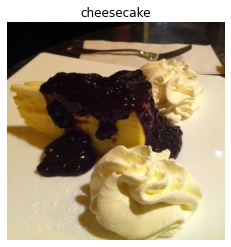

In [8]:
def view_random_image(target_dir, target_class):
      # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

  # View a random image from the training dataset
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="cheesecake")

In [9]:
img

array([[[  3,   4,   8],
        [  3,   4,   8],
        [  3,   4,   8],
        ...,
        [ 38,  31,  25],
        [ 35,  28,  22],
        [ 33,  26,  20]],

       [[  2,   3,   7],
        [  2,   3,   7],
        [  2,   3,   7],
        ...,
        [ 37,  30,  24],
        [ 34,  27,  21],
        [ 33,  26,  20]],

       [[  1,   2,   6],
        [  1,   2,   6],
        [  1,   2,   6],
        ...,
        [ 33,  26,  18],
        [ 32,  25,  19],
        [ 31,  24,  18]],

       ...,

       [[221, 209, 159],
        [222, 210, 160],
        [224, 211, 166],
        ...,
        [220, 216, 178],
        [219, 215, 177],
        [218, 214, 176]],

       [[222, 210, 158],
        [222, 210, 160],
        [222, 209, 164],
        ...,
        [222, 218, 181],
        [221, 217, 180],
        [220, 216, 179]],

       [[223, 211, 159],
        [221, 209, 159],
        [220, 208, 160],
        ...,
        [223, 219, 182],
        [223, 219, 182],
        [222, 218, 181]]

In [10]:
img/255.

array([[[0.01176471, 0.01568627, 0.03137255],
        [0.01176471, 0.01568627, 0.03137255],
        [0.01176471, 0.01568627, 0.03137255],
        ...,
        [0.14901961, 0.12156863, 0.09803922],
        [0.1372549 , 0.10980392, 0.08627451],
        [0.12941176, 0.10196078, 0.07843137]],

       [[0.00784314, 0.01176471, 0.02745098],
        [0.00784314, 0.01176471, 0.02745098],
        [0.00784314, 0.01176471, 0.02745098],
        ...,
        [0.14509804, 0.11764706, 0.09411765],
        [0.13333333, 0.10588235, 0.08235294],
        [0.12941176, 0.10196078, 0.07843137]],

       [[0.00392157, 0.00784314, 0.02352941],
        [0.00392157, 0.00784314, 0.02352941],
        [0.00392157, 0.00784314, 0.02352941],
        ...,
        [0.12941176, 0.10196078, 0.07058824],
        [0.1254902 , 0.09803922, 0.0745098 ],
        [0.12156863, 0.09411765, 0.07058824]],

       ...,

       [[0.86666667, 0.81960784, 0.62352941],
        [0.87058824, 0.82352941, 0.62745098],
        [0.87843137, 0

In [12]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="sparse", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 7575 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
Epoch 1/2
237/237 [==============================] - 1267s 5s/step - loss: -32754722816.0000 - accuracy: 0.0099 - val_loss: -248991203328.0000 - val_accuracy: 0.0099
Epoch 2/2
237/237 [==============================] - 1149s 5s/step - loss: -4530386763776.0000 - accuracy: 0.0099 - val_loss: -15529943236608.0000 - val_accuracy: 0.0099


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

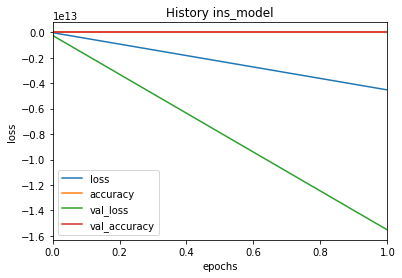

In [14]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [16]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

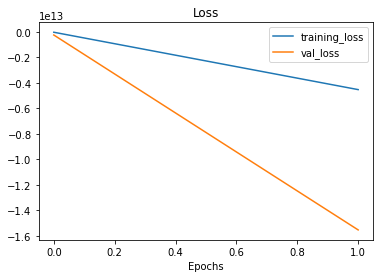

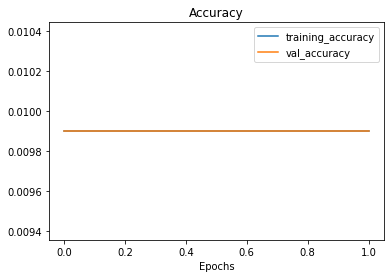

In [17]:
plot_loss_curves(history_1)

In [18]:
model_1.save('model1.h5')